 f =  0.836764705882353*x + 13.825
coef_correlación   r  =  0.3938197244585802
coef_determinación r2 =  0.15509397537263203
15.51% de los datos
     está descrito en el modelo lineal


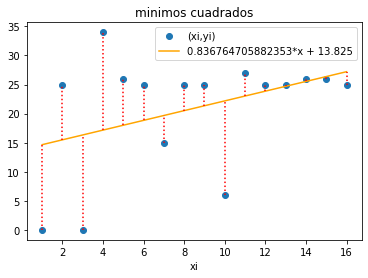

In [2]:
# mínimos cuadrados, regresión con polinomio grado 1
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO
xi = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
yi = [0,25,0,34,26,25,15,25,25,6,27,25,25,26,26,25]

# PROCEDIMIENTO
xi = np.array(xi,dtype=float)
yi = np.array(yi,dtype=float)
n  = len(xi)

# sumatorias y medias
xm  = np.mean(xi)
ym  = np.mean(yi)
sx  = np.sum(xi)
sy  = np.sum(yi)
sxy = np.sum(xi*yi)
sx2 = np.sum(xi**2)
sy2 = np.sum(yi**2)

# coeficientes a0 y a1
a1 = (n*sxy-sx*sy)/(n*sx2-sx**2)
a0 = ym - a1*xm

# polinomio grado 1
x = sym.Symbol('x')
f = a0 + a1*x

fx = sym.lambdify(x,f)
fi = fx(xi)

# coeficiente de correlación
numerador = n*sxy - sx*sy
raiz1 = np.sqrt(n*sx2-sx**2)
raiz2 = np.sqrt(n*sy2-sy**2)
r = numerador/(raiz1*raiz2)

# coeficiente de determinacion
r2 = r**2
r2_porcentaje = np.around(r2*100,2)

# SALIDA
# print('ymedia =',ym)
print(' f = ',f)
print('coef_correlación   r  = ', r)
print('coef_determinación r2 = ', r2)
print(str(r2_porcentaje)+'% de los datos')
print('     está descrito en el modelo lineal')

# grafica
plt.plot(xi,yi,'o',label='(xi,yi)')
# plt.stem(xi,yi,bottom=ym,linefmt ='--')
plt.plot(xi,fi, color='orange',  label=f)

# lineas de error
for i in range(0,n,1):
    y0 = np.min([yi[i],fi[i]])
    y1 = np.max([yi[i],fi[i]])
    plt.vlines(xi[i],y0,y1, color='red',
               linestyle ='dotted')
plt.legend()
plt.xlabel('xi')
plt.title('minimos cuadrados')
plt.show()

In [3]:
coeficientes = np.corrcoef(xi,yi)
print(coeficientes)

r = coeficientes[0,1]
print(r)


[[1.         0.33462275]
 [0.33462275 1.        ]]
0.33462275086031806
